# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 0383 Зенин Пётр и Ханина Мария. Вариант №20.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Частотный анализ - это метод исследования частотных свойств нерекурсивных фильтров, используемых для полиномиального сглаживания дискретного сигнала. Он заключается в построении графиков передаточных функций фильтров, которые описывают зависимость выходного сигнала от входного в частотной области. Анализ этих графиков позволяет определить способность фильтра к подавлению определенных частотных компонент и выбрать наиболее подходящий фильтр для конкретной задачи обработки сигнала.

Частотный фильтр работает следующим образом:

$$y_k = \sum\limits_{n=-N}^N h_nS(k-n)$$

где S - входное воздействие, y – результат фильтрации, h – коэффициенты фильтра.


Дб (децибел) - величина, равная $20\lg\left(\frac{|y_n|}{|s_n|}\right)$. 

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики 
$\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

#### 1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал: $s(t)$

Выходной сигнал: $y(t) = A + Bt$

Приближение (в смысле МНК) прямой линией по $2n+1$ точкам:

$F(A,B) = \sum\limits_{k=-n}^n{(s_k - y_k)^2} = \sum\limits_{k=-n}^n(s_k - A -Bk)^2 \Rightarrow \min$

Следовательно, система нормальных уравнений:

\begin{cases}
(2n+1)A + 0B = \sum\limits_{k=-n}^n s_k \\
0A + \frac{n(n+1)(2n+1)}{3}B = \sum\limits_{k=-n}^nks_k\\
\end{cases}

В итоге:

$y_0 = A = \frac{1}{2n+1} \sum\limits_{k=-n}^n s_k = \frac{1}{2n+1}(s_{-n} + s_{-n+1}+ \dots +s_{n-1} + s_n)$

$y_i = \frac{1}{2n+1} \sum\limits_{k=i-n}^{i+n} s_k = \frac{1}{2n+1}(s_{i-n} + s_{i-n+1} + \dots + s_{i+n-1} + s_{i+n})$

Подставив $s_n = e^{i \omega n}$, приходим к:

$H(\omega) = \frac{1}{2n+1}(e^{-ni\omega} + e^{(-n+1)i\omega} + \dots + e^{(n-1)i\omega} + e^{ni\omega}) = \frac{\sin(\frac{(2n+1)\omega}{2})}{(2n+1)\sin(\frac{\omega}{2})}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

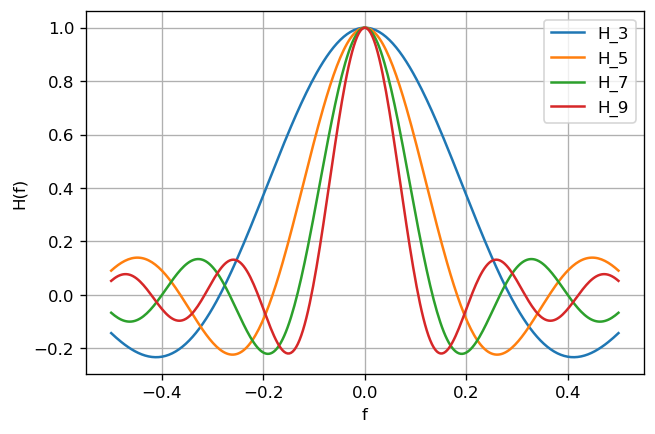

In [42]:
points = [3,5,7,9]
results = []
resolution = 300

x = np.linspace(-0.5,0.5,resolution)

def h_n(n, resolution=500):
    x = np.linspace(-0.5,0.5,resolution) * pi
    return np.sin(x*(2*n+1)/2) / ((2*n+1) * np.sin(x/2))

for n in points:
    results.append(h_n(n, resolution))

plt.figure(dpi=120)
for i in range(len(points)):
    plt.plot(x,results[i], label = f"H_{points[i]}")

plt.xlabel("f")
plt.ylabel("H(f)")
plt.legend()
plt.grid(1)
plt.show()


При увеличении количества точек, по которым выполнятеся сглаживание, наблюдается резкий спад передаточной функции, при отдалении от нуля. По краям окна наблюдаются выраженные колебания, амплитуда которых увеличивается с увеличением количество точек, по которым выполняется сглаживание фильтром (явление Гиббса).

#### 2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал: $s(t)$

Выходной сигнал: $F(A, B, C) = \sum\limits_{k=-n}{n} (s_k - y_k)^2 = \sum\limits_{k=-n}^{n}(s_k - A - Bk - Ck^2)^2 \Rightarrow \min$ 

7 точек:

$\tilde{H}(f) = \frac{1}{21}\cdot (7 + 12\cos(\omega) + 6\cos(2\omega) - 4\cos(3\omega))$

9 точек:

$H(\omega) = \frac{1}{231} \cdot (59 + 108\cos(\omega) + 78\cos(2\omega) + 28\cos(3\omega) - 42\cos(4\omega))$

11 точек:

$H(\omega) = \frac{1}{429} \cdot (89 + 168\cos(\omega) + 138\cos(2\omega) + 88\cos(3\omega) + 18\cos(4\omega) - 72\cos(5\omega))$

13 точек:

$H(\omega) = \frac{1}{143} \cdot (25 + 48\cos(\omega) + 42\cos(2\omega) + 32\cos(3\omega) + 18\cos(4\omega) - 22\cos(6\omega))$

[]

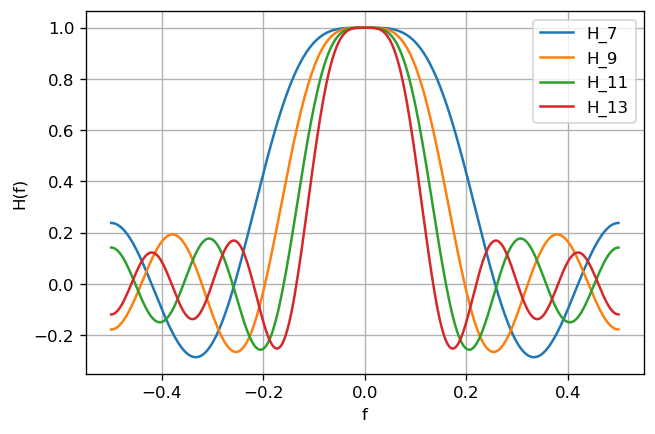

In [41]:
resolution = 300
x = np.linspace(-0.5, 0.5, resolution)

def h_7(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/21 * (7 + 12 * np.cos(x) + 6 * np.cos(2*x) - 4 * np.cos(3*x))

def h_9(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/231 * (59 + 108 * np.cos(x) + 78 * np.cos(2*x) + 28 * np.cos(3*x) - 42 * np.cos(4*x))

def h_11(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/429 * (89 + 168 * np.cos(x) + 138 * np.cos(2*x) + 88 * np.cos(3*x) + 18 * np.cos(4*x) - 72 * np.cos(5*x))

def h_13(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/143 * (25 + 48 * np.cos(x) + 42 * np.cos(2*x) + 32 * np.cos(3*x) + 18 * np.cos(4*x) - 22 * np.cos(6 * x))

plt.figure(dpi=120)
plt.plot(x,h_7(resolution), label = "H_7")
plt.plot(x,h_9(resolution), label = "H_9")
plt.plot(x,h_11(resolution), label = "H_11")
plt.plot(x,h_13(resolution), label = "H_13")

plt.xlabel("f")
plt.ylabel("H(f)")



plt.legend()
plt.grid(1)
plt.plot()

#### 3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал: $s(t)$

Выходной сигнал: $F(A, B, C, D, E) = \sum\limits_{k=-n}{n} (s_k - y_k)^2 = \sum\limits_{k=-n}^{n}(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2 \Rightarrow \min$

9 точек:

$H(\omega) = \frac{1}{429} \cdot (179 + 270 \cos(\omega) + 60 \cos (2\omega)  - 110\cos(3\omega) + 30\cos(4\omega))$

11 точек:

$H(\omega) = \frac{1}{429} \cdot (143 + 240\cos(\omega) + 120\cos(2\omega) - 20\cos(3\omega) - 90\cos(4\omega) + 36 \cos(5\omega))$

13 точек:

$H(\omega) = \frac{1}{2431} \cdot (677 + 1200\cos(\omega) + 780 \cos(2\omega) + 220\cos(3\omega) - 270\cos(4\omega) - 396\cos(5\omega) + 220\cos(6\omega))$

15 точек:

$H(\omega) = \frac{1}{46189} \cdot (11063 + 20250\cos(\omega) + 15000\cos(2\omega) + 7510\cos(3\omega) - 330 \cos(4\omega) - 5874\cos(5\omega) - 5720\cos(6\omega) + 4290\cos(7\omega))$

[]

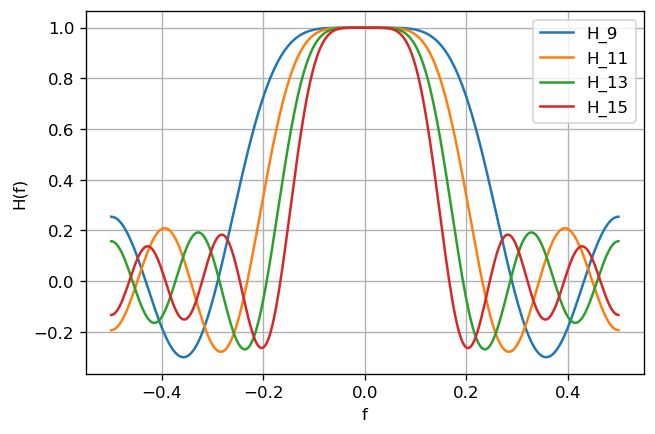

In [40]:
resolution = 300
x = np.linspace(-0.5, 0.5, resolution)

def h_9(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/429 * (179 + 270 * np.cos(x) + 60*np.cos(2*x) - 110*np.cos(3*x) + 30 * np.cos(4*x))

def h_11(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/429 * (143 + 240 * np.cos(x) + 120*np.cos(2*x) - 20 * np.cos(3*x) - 90*np.cos(4*x) + 36 * np.cos(5*x))

def h_13(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/2431 * (677 + 1200*np.cos(x) + 780 * np.cos(2*x) + 220*np.cos(3*x) - 270*np.cos(4*x) - 396*np.cos(5*x) + 220 * np.cos(6*x))

def h_15(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/46189 * (11063 + 20250*np.cos(x) + 15000*np.cos(2*x) + 7510*np.cos(3*x) - 330 * np.cos(4*x) - 5874 * np.cos(5*x) - 5720 * np.cos(6*x) + 4290 * np.cos(7*x))

plt.figure(dpi=120)
plt.plot(x,h_9(resolution), label = "H_9")
plt.plot(x,h_11(resolution), label = "H_11")
plt.plot(x,h_13(resolution), label = "H_13")
plt.plot(x,h_15(resolution), label = "H_15")

plt.xlabel("f")
plt.ylabel("H(f)")

plt.legend()
plt.grid(1)
plt.plot()

По сравнению со сглаживанием квадратичными полиномами, сглаживание полиномами четвёртой степени требует больше вычислительных ресурсов, но не улучшает поведение предаточной функции вдали от нуля, сохраняя явление Гиббса на прежем уровне. Крутизна спуска передаточной функции также схожа с крутизной спуска передаточной функции сглаживающего фильтра квадратичным полиномом.

#### 4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Передаточные функции для сглаживающих формул Спенсера по 15 и 21 точкам выглядят следующим образом:

15 точек:

$H(\omega) = \frac{1}{320} \cdot (74 + 134 \cos(\omega) + 92\cos(2\omega) + 42\cos(3\omega) + 6\cos(4\omega) - 10\cos(5\omega) - 12\cos(6\omega) - 6\cos(7\omega))$

21 точка:

$H(\omega) = \frac{1}{350} \cdot (60 + 114\cos(\omega) + 94\cos(2\omega) + 66\cos(3\omega) + 36\cos(4\omega) + 12\cos(5\omega) - 4 \cos(6\omega) - 10\cos(7\omega) - 10\cos(8\omega) - 6\cos(9\omega) - 2\cos(10\omega)) $



[]

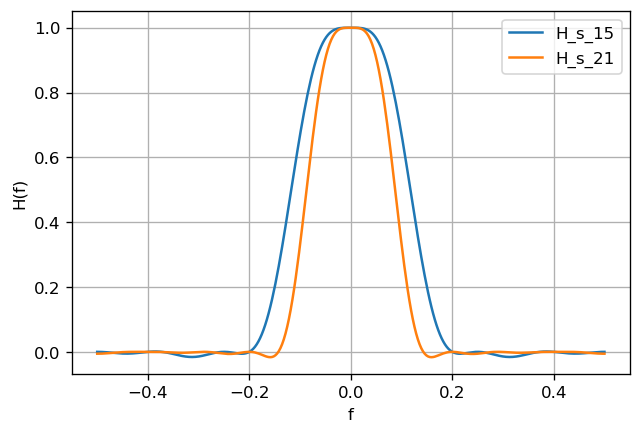

In [43]:
resolution = 300
x = np.linspace(-0.5, 0.5, resolution)

def s_15(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/320 * (74 + 134 * np.cos(x) + 92 * np.cos(2*x) + 42 * np.cos(3*x) + 6 * np.cos(4*x) - 10 * np.cos(5*x) - 12 * np.cos(6*x) - 6 * np.cos(7*x))

def s_21(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/350 * (60 + 114 * np.cos(x) + 94 * np.cos(2*x) + 66 * np.cos(3*x) + 36 * np.cos(4*x) + 12 * np.cos(5*x) - 4 * np.cos(6*x) - 10*np.cos(7*x) - 10 * np.cos(8*x) - 6*np.cos(9*x) - 2*np.cos(10*x))

plt.figure(dpi=120)
plt.plot(x,s_15(resolution), label = "H_s_15")
plt.plot(x,s_21(resolution), label = "H_s_21")

plt.xlabel("f")
plt.ylabel("H(f)")

plt.legend()
plt.grid(1)
plt.plot()

Крутизна спада передаточной функции сглаживания Спенсера по 21 точкам больше, чем по 15 точкам. Амплитуда колебаний передаточной функции вдали от нуля, по сравнению со сглаживанием при помощи полиномов, сильно меньше.

#### 5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

Дб (децибел) - величина, равная $20\lg\left(\frac{|y_n|}{|s_n|}\right)$. 

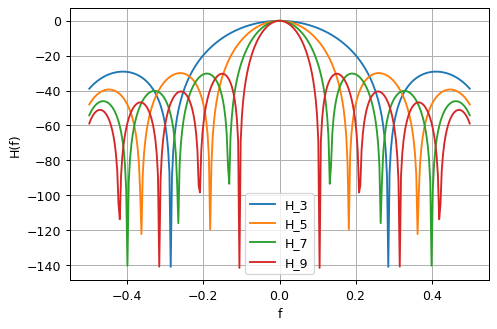

In [56]:
points = [3,5,7,9]
results = []
resolution = 300

x = np.linspace(-0.5,0.5,resolution)

def h_n(n, resolution=500):
    x = np.linspace(-0.5,0.5,resolution) * pi
    return np.sin(x*(2*n+1)/2) / ((2*n+1) * np.sin(x/2))

for n in points:
    results.append(h_n(n, resolution))

plt.figure(dpi=90)
for i in range(len(points)):
    plt.plot(x,20*np.log(np.abs(results[i])), label = f"H_{points[i]}")

plt.xlabel("f")
plt.ylabel("H(f)")
plt.legend()
plt.grid(1)
plt.show()


[]

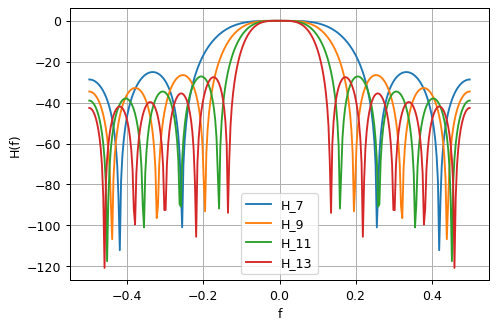

In [57]:
resolution = 300
x = np.linspace(-0.5, 0.5, resolution)

def h_7(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/21 * (7 + 12 * np.cos(x) + 6 * np.cos(2*x) - 4 * np.cos(3*x))

def h_9(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/231 * (59 + 108 * np.cos(x) + 78 * np.cos(2*x) + 28 * np.cos(3*x) - 42 * np.cos(4*x))

def h_11(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/429 * (89 + 168 * np.cos(x) + 138 * np.cos(2*x) + 88 * np.cos(3*x) + 18 * np.cos(4*x) - 72 * np.cos(5*x))

def h_13(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/143 * (25 + 48 * np.cos(x) + 42 * np.cos(2*x) + 32 * np.cos(3*x) + 18 * np.cos(4*x) - 22 * np.cos(6 * x))

plt.figure(dpi=90)
plt.plot(x,20*np.log(np.abs(h_7(resolution))), label = "H_7")
plt.plot(x,20*np.log(np.abs(h_9(resolution))), label = "H_9")
plt.plot(x,20*np.log(np.abs(h_11(resolution))), label = "H_11")
plt.plot(x,20*np.log(np.abs(h_13(resolution))), label = "H_13")

plt.xlabel("f")
plt.ylabel("H(f)")



plt.legend()
plt.grid(1)
plt.plot()

[]

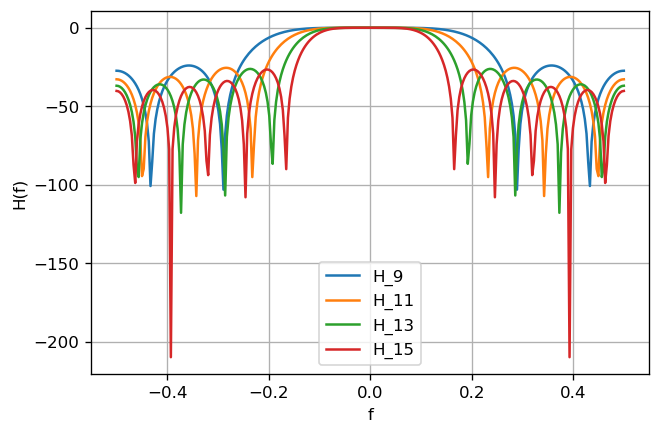

In [58]:
resolution = 300
x = np.linspace(-0.5, 0.5, resolution)

def h_9(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/429 * (179 + 270 * np.cos(x) + 60*np.cos(2*x) - 110*np.cos(3*x) + 30 * np.cos(4*x))

def h_11(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/429 * (143 + 240 * np.cos(x) + 120*np.cos(2*x) - 20 * np.cos(3*x) - 90*np.cos(4*x) + 36 * np.cos(5*x))

def h_13(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/2431 * (677 + 1200*np.cos(x) + 780 * np.cos(2*x) + 220*np.cos(3*x) - 270*np.cos(4*x) - 396*np.cos(5*x) + 220 * np.cos(6*x))

def h_15(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/46189 * (11063 + 20250*np.cos(x) + 15000*np.cos(2*x) + 7510*np.cos(3*x) - 330 * np.cos(4*x) - 5874 * np.cos(5*x) - 5720 * np.cos(6*x) + 4290 * np.cos(7*x))

plt.figure(dpi=120)
plt.plot(x,20*np.log(np.abs(h_9(resolution))), label = "H_9")
plt.plot(x,20*np.log(np.abs(h_11(resolution))), label = "H_11")
plt.plot(x,20*np.log(np.abs(h_13(resolution))), label = "H_13")
plt.plot(x,20*np.log(np.abs(h_15(resolution))), label = "H_15")

plt.xlabel("f")
plt.ylabel("H(f)")

plt.legend()
plt.grid(1)
plt.plot()

C:\Users\WDMFR\AppData\Local\Temp\ipykernel_20468\2346135542.py:13: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,20*np.log(np.abs(s_15(resolution))), label = "H_s_15")


[]

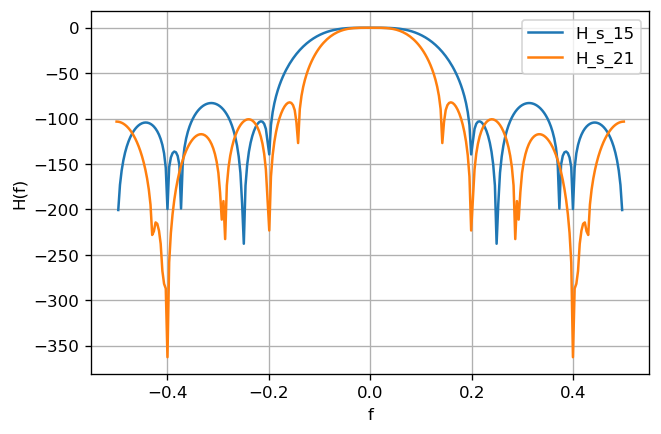

In [59]:
resolution = 300
x = np.linspace(-0.5, 0.5, resolution)

def s_15(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/320 * (74 + 134 * np.cos(x) + 92 * np.cos(2*x) + 42 * np.cos(3*x) + 6 * np.cos(4*x) - 10 * np.cos(5*x) - 12 * np.cos(6*x) - 6 * np.cos(7*x))

def s_21(resolution):
    x = np.linspace(-0.5, 0.5, resolution) * 2*pi
    return 1/350 * (60 + 114 * np.cos(x) + 94 * np.cos(2*x) + 66 * np.cos(3*x) + 36 * np.cos(4*x) + 12 * np.cos(5*x) - 4 * np.cos(6*x) - 10*np.cos(7*x) - 10 * np.cos(8*x) - 6*np.cos(9*x) - 2*np.cos(10*x))

plt.figure(dpi=120)
plt.plot(x,20*np.log(np.abs(s_15(resolution))), label = "H_s_15")
plt.plot(x,20*np.log(np.abs(s_21(resolution))), label = "H_s_21")

plt.xlabel("f")
plt.ylabel("H(f)")

plt.legend()
plt.grid(1)
plt.plot()

Построение графика с использованием Дб переводит график значений в логарифмическую шкалу, тем самым позволяя более наглядно отображать изменения значения функции вне зависимости от размера порядка числа.

#### 6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

При использовании сглаживающих функций на основе полиномов, прослеживается свзяь между увеличением степени полинома и шириной полосы вокруг нуля, в которой отсутсвует явления Гиббса, однако при увеличении как степени сглаживающего полинома, так и количества точек, по которым происходит сглаживание, не происходит уменьшение являения Гиббса. Сглаживающая функция Спенсера имеет сравнимую крутизну спуска передаточной функции со сглаживающими фильтрами с использованием квадратичного полинома и полинома четвёртой степени, но занчительно менее выраженное явление Гиббса.

## Выводы

В этой работе были вычислены формулы различных сглаживающих фильтров, использующих полиномы второй и четвёртой степени. Были найдены и построены графики передаточных функций. Были проанализированы и сравнены между собой графики передаточных функций сглаживающих фильтров, использующих разное количество точек и разную степень полинома. Была наглядно показана эффективность формулы сглаживающего фильтра Спенсера, позволяющего обойти недостаток полиномиальных функций сглаживания, такого как явление Гиббса.